In [1]:
import numpy as np
import scipy.special
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.special import lambertw

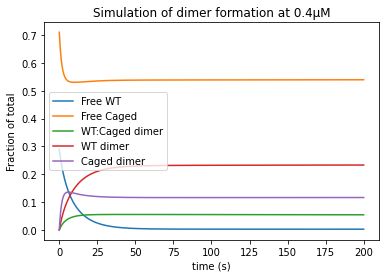

Percent in WT dimer: 23.31%


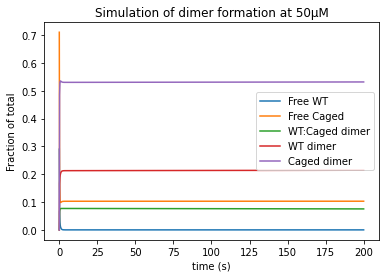

Percent in WT dimer: 21.44%


In [23]:
HIVPR_total_conc=0.4 #uM
HIVPR_1_total=0.71*HIVPR_total_conc
HIVPR_WT_total=0.29*HIVPR_total_conc
Kd_W=.0001
Kd_WC=.01
Kd_C=1
ka=0.4 #uM-1, s-1
kd_W=Kd_W*ka
kd_WC=Kd_WC*ka
kd_C=Kd_C*ka

def Dimer_ODEs (Y, t, ka, kd_W, kd_WC, kd_C, W0, C0):
    W, C, WC, W2, C2=Y
    dWdt=kd_W*(W0-W-WC)+kd_WC*WC-ka*(W**2+W*C)
    dCdt=kd_WC*WC+kd_C*(C0-C-WC)-ka*(C**2+W*C)
    dW2dt=ka*W**2-kd_W*(W0-W-WC)
    dWCdt=ka*W*C-kd_WC*WC
    dC2dt=ka*C**2-kd_C*(C0-C-WC)
    dydt=[dWdt, dCdt, dW2dt, dWCdt, dC2dt]
    return dydt
    
#initial conditions
Y0=[HIVPR_WT_total, HIVPR_1_total, 0, 0, 0]
W0=HIVPR_WT_total
C0=HIVPR_1_total

#Define the timepoints
t=np.linspace(0,200, 1000)

#Integrate
Y1=odeint(Dimer_ODEs, Y0, t, args=(ka, kd_W, kd_WC, kd_C, W0, C0))

#Plot Y(t)
plt.figure(0)
plt.plot(t, Y1[:, 0]/HIVPR_total_conc, label='Free WT')
plt.plot(t, Y1[:, 1]/HIVPR_total_conc, label='Free Caged')
plt.plot(t, Y1[:, 2]/HIVPR_total_conc, label='WT:Caged dimer')
plt.plot(t, (W0-Y1[:, 2]-Y1[:, 0])/HIVPR_total_conc, label='WT dimer')
plt.plot(t, (C0-Y1[:, 2]-Y1[:, 1])/HIVPR_total_conc, label='Caged dimer')
plt.title('Simulation of dimer formation at 0.4\u03BCM')
plt.xlabel('time (s)')
plt.ylabel('Fraction of total')
plt.legend()
plt.show()

#Print fraction in WT dimer
val='%.2f'%(((W0-Y1[-1, 2]-Y1[-1, 0])/HIVPR_total_conc*100))
print("Percent in WT dimer: "+str(val)+"%")



#Let's look at the caging reaction concentration
HIVPR_total_conc=50 #uM
HIVPR_1_total=0.71*HIVPR_total_conc
HIVPR_WT_total=0.29*HIVPR_total_conc

#initial conditions
Y0=[HIVPR_WT_total, HIVPR_1_total, 0, 0, 0]
W0=HIVPR_WT_total
C0=HIVPR_1_total

Y2=odeint(Dimer_ODEs, Y0, t, args=(ka, kd_W, kd_WC, kd_C, W0, C0))

#Plot Y(t)
plt.figure(0)
plt.plot(t, Y2[:, 0]/HIVPR_total_conc, label='Free WT')
plt.plot(t, Y2[:, 1]/HIVPR_total_conc, label='Free Caged')
plt.plot(t, Y2[:, 2]/HIVPR_total_conc, label='WT:Caged dimer')
plt.plot(t, (W0-Y2[:, 2]-Y2[:, 0])/HIVPR_total_conc, label='WT dimer')
plt.plot(t, (C0-Y2[:, 2]-Y2[:, 1])/HIVPR_total_conc, label='Caged dimer')
plt.title('Simulation of dimer formation at 50\u03BCM')
plt.xlabel('time (s)')
plt.ylabel('Fraction of total')
plt.legend()
plt.show()

#Print fraction in WT dimer
val='%.2f'%(((W0-Y2[-1, 2]-Y2[-1, 0])/HIVPR_total_conc*100))
print("Percent in WT dimer: "+str(val)+"%")
